# <center> **Generación de datos aleatorios** </center>
## <font size=4> **Inteligencia Artificial 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np             # cálculo numérico
import scipy as sp
import scipy.stats as st       # estadística

import matplotlib.pyplot as plt  # graficación
import seaborn as sns            # graficación

In [2]:
import warnings
warnings.filterwarnings('ignore')

En este notebook vamos a usar la librería de $\texttt{scipy.stats}$ para generar datos aleatorios. Vamos a considerar el caso de varias variables aleatorias conocidas, algunas discretas y otras continuas.

## Ejemplo Bernoulli

In [3]:
np.random.seed(12345)       # siempre es adecuado establecer una semilla para efectos de replicabilidad.

In [4]:
# Generar una muestra de una variable Bernoulli Ber(0.5)
# de tamaño N = 1000

N = 1000
p = 0.5
sample = st.bernoulli.rvs(p, size=N)

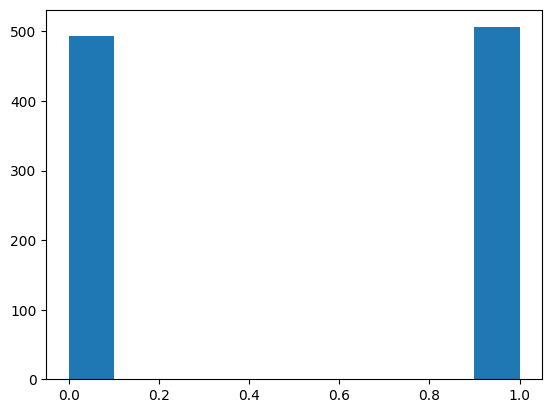

In [5]:
plt.figure()
plt.hist(sample)
plt.show()

In [6]:
print((sample==0).sum())
print((sample==1).sum())

494
506


## Ejemplo Uniforme

In [7]:
# Generar una muestra de una variable Uniforme U[a,b]
# de tamaño N = 5000

N = 5000
a = 8
b = 18
sample = a + (b-a)*st.uniform.rvs(size=N)

In [8]:
sample.shape

(5000,)

In [9]:
print(sample.min())
print(sample.max())

8.005011225492705
17.993597746764582


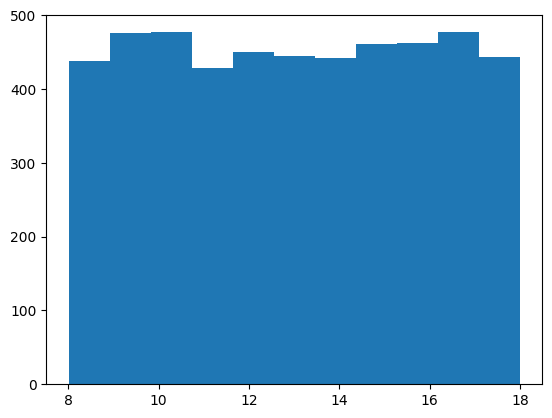

In [10]:
bns = b - a + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [11]:
bins = np.arange(a, b+1)
bins

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [12]:
x, y = np.histogram(sample, bins=bins)

In [13]:
print(x.shape, y.shape)

(10,) (11,)


Graficamos a continuación la función de densidad (se obtiene dividiendo el histograma dentro del número de datos $N$).

También graficamos la función de distribución (esta se obtiene haciendo la suma acumulada del histograma y dividiendo entre $N$).

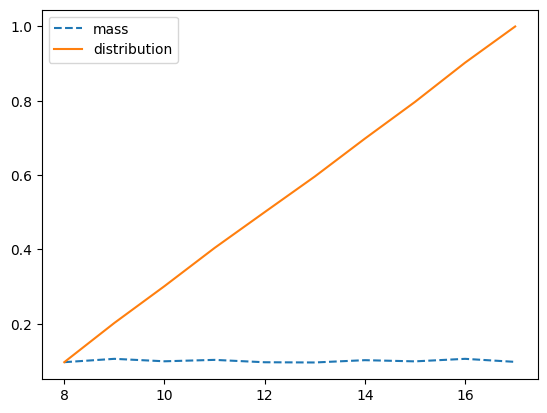

In [14]:
plt.figure()
plt.plot(y[:-1], x/N, '--', label='mass')
plt.plot(y[:-1], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [15]:
# imprimiendo el valor exacto de la probabilidad para cada x
for i in range(a, b):
    print(i, ((sample >= i) & (sample < i+1)).sum() / N)

8 0.0966
9 0.1056
10 0.099
11 0.1028
12 0.0964
13 0.0958
14 0.102
15 0.0988
16 0.1056
17 0.0974


## Ejemplo Binomial

In [16]:
# Generar una muestra de una variable Binomial Bin(k, p)
# de tamaño N = 10000

N = 10000
k = 25
p = 0.25
sample = st.binom.rvs(k, p=p, size=N)

In [17]:
sample.shape

(10000,)

In [18]:
sample[:44]

array([ 5,  9,  1,  6,  6,  6,  4,  2,  6,  9,  8, 10, 12,  5,  4,  4,  3,
        9,  5,  9,  6,  5,  3,  8, 10, 10,  9, 11,  4,  2,  6,  9,  5,  3,
        6,  6,  4,  4,  6,  9,  6,  8,  6,  6])

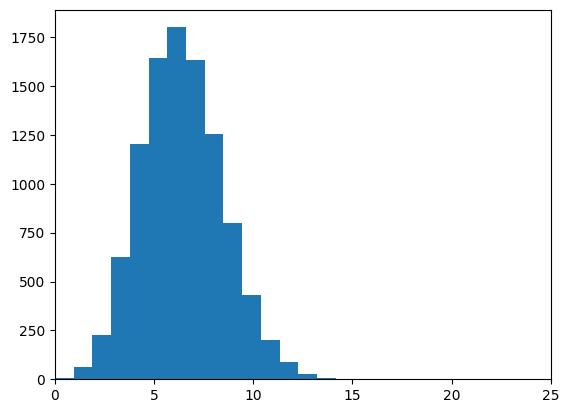

In [19]:
bns = sample.max() - sample.min() + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.xlim([0,k])
plt.show()

In [20]:
bins = np.arange(sample.min(), sample.max()+1)
x, y = np.histogram(sample, bins=bns)

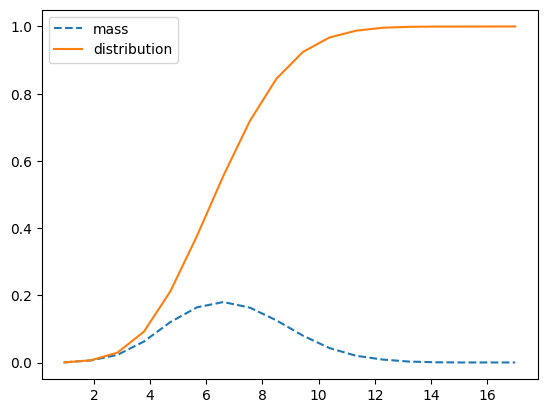

In [21]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [22]:
# imprimiendo el valor de probabilidad para cada x
for i in range(0, k+1):
    print('%02d %5.5f %5.5f' % (i, (sample==i).sum() / N, sp.special.binom(k, i)/(2**k)))

00 0.00040 0.00000
01 0.00620 0.00000
02 0.02260 0.00001
03 0.06230 0.00007
04 0.12030 0.00038
05 0.16420 0.00158
06 0.18000 0.00528
07 0.16320 0.01433
08 0.12540 0.03223
09 0.07980 0.06089
10 0.04290 0.09742
11 0.02010 0.13284
12 0.00880 0.15498
13 0.00280 0.15498
14 0.00070 0.13284
15 0.00010 0.09742
16 0.00010 0.06089
17 0.00010 0.03223
18 0.00000 0.01433
19 0.00000 0.00528
20 0.00000 0.00158
21 0.00000 0.00038
22 0.00000 0.00007
23 0.00000 0.00001
24 0.00000 0.00000
25 0.00000 0.00000


In [23]:
sample.mean()    #media empírica

np.float64(6.291)

In [24]:
k*p              #media teórica

6.25

In [25]:
error = np.abs(sample.mean() - k*p) / (k*p)
print(error)
print('error = {}%'.format(error * 100))

0.006560000000000059
error = 0.6560000000000059%


## Ejemplo Geométrica

In [26]:
# Generar una muestra de una variable Binomial Bin(k, p)
# de tamaño N = 10000

N = 10000
p = 0.25
sample = np.random.geometric(p=p, size=N)

In [27]:
sample.shape

(10000,)

In [28]:
sample[:44]

array([ 2,  1,  9,  2,  1,  7,  5,  6,  4,  2,  7,  1,  1,  5,  6,  2, 11,
        3, 12,  4,  3,  4,  2,  5,  1,  5,  1,  5,  2,  4,  1,  1,  1,  3,
       12,  2,  5,  2,  7,  1,  4,  3,  4,  1], dtype=int32)

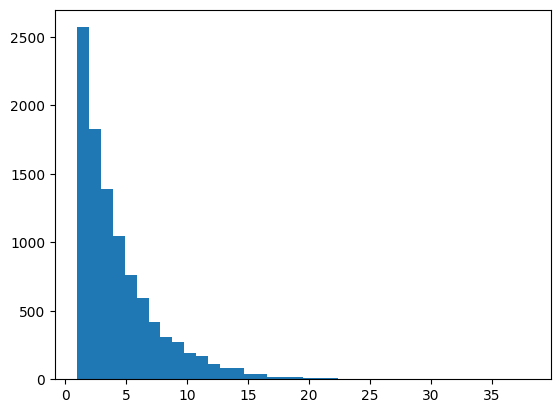

In [29]:
bns = sample.max() - sample.min() + 1
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [30]:
bins = np.arange(sample.min(), sample.max()+1)
x, y = np.histogram(sample, bins=bns)

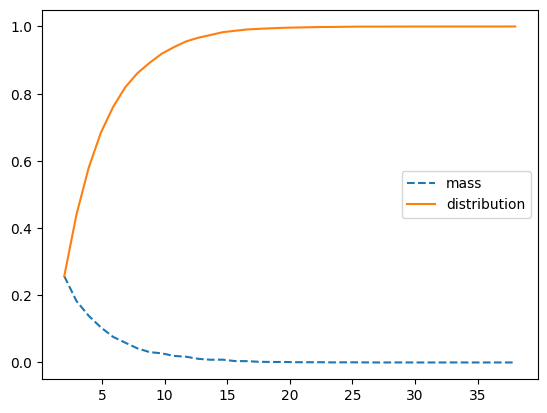

In [31]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

In [32]:
# imprimiendo los valores de probabilidad
for i in range(1, sample.max()+1):
    print(i, (sample==i).sum() / N)

1 0.2569
2 0.183
3 0.1391
4 0.1046
5 0.0763
6 0.059
7 0.042
8 0.0309
9 0.0272
10 0.0195
11 0.0171
12 0.0109
13 0.0081
14 0.0084
15 0.0042
16 0.0039
17 0.002
18 0.0015
19 0.0015
20 0.0008
21 0.0007
22 0.0008
23 0.0002
24 0.0005
25 0.0004
26 0.0001
27 0.0
28 0.0001
29 0.0001
30 0.0
31 0.0
32 0.0
33 0.0001
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0001


In [33]:
sample.mean()   #media empírica

np.float64(4.0221)

In [34]:
1/p             #media teórica

4.0

In [35]:
error = np.abs(sample.mean() - 1/p) * p
print(error)
print('error = {}%'.format(error * 100))

0.005525000000000002
error = 0.5525000000000002%


## Ejemplo Gamma

In [36]:
# Generar una muestra de una variable gaussiana N(mu, sigma)
# de tamaño N = 1000

N = 1000
a = 2      # parámetro de forma
b = 5      # parámetro de localización
sample = st.gamma.rvs(a, b, size=N)

In [37]:
sample.shape

(1000,)

In [38]:
sample[:44]

array([ 5.292282  ,  8.20249599,  7.13126026,  6.36711399,  5.69172463,
        6.24323816,  7.51090997,  7.66535581,  9.22516267,  5.94448093,
        6.74938439,  6.08484098,  5.34073894,  5.92669524,  5.99437726,
        8.2180924 ,  5.20660585,  6.35309222,  5.8111155 ,  7.16391374,
        7.92815462,  6.12007036,  6.67932683,  7.52401571,  6.66755961,
        7.22056179,  6.06288205,  5.69173487,  5.92632795,  7.13970197,
        5.61515551,  6.73345427,  7.91223362,  7.17340326, 11.01794482,
        7.19649502,  7.59269169,  6.68637387,  6.45278938,  8.05872609,
        6.38323323,  8.50983812,  8.30679943,  6.03297418])

26


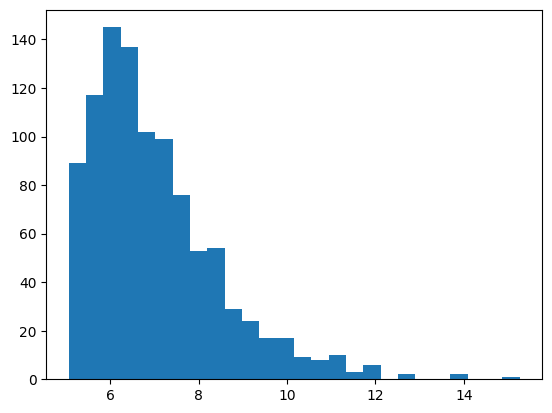

In [39]:
bns = int(3.3*(1 + np.log(N)))
print(bns)
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [40]:
x, y = np.histogram(sample, bins=bns)

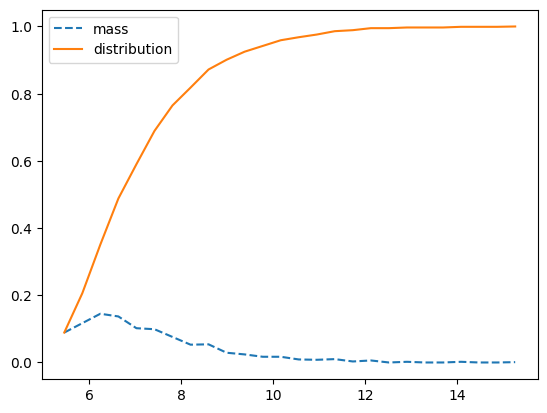

In [41]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

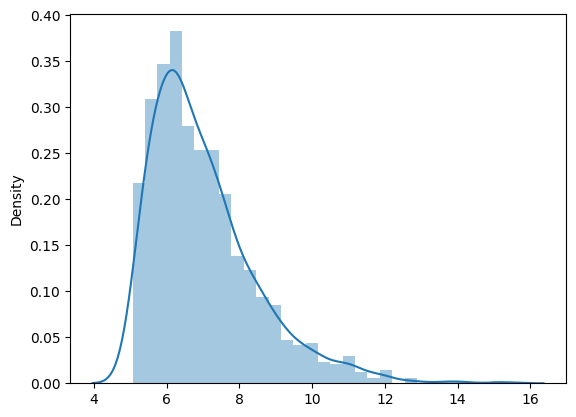

In [42]:
# densidad aproximada
plt.figure()
sns.distplot(sample, kde=True)
plt.show()

## Ejemplo Possion

In [43]:
# Generar una muestra de una variable Poisson(lambda)
# de tamaño N = 10000

N = 10000
lamb = 7      # parámetro de forma

sample = np.random.poisson(lamb, size=N)

In [44]:
sample.shape

(10000,)

In [45]:
sample[:44]

array([ 6,  8,  9,  6, 12,  8,  7,  9, 10,  8,  3, 12,  7,  8,  5,  7, 13,
        4,  4,  4,  4,  8, 11,  4,  6,  4,  7,  5,  3,  9,  8,  9,  7,  8,
        3,  7,  8,  8,  7,  6,  7,  4,  8,  6], dtype=int32)

In [46]:
print(sample.min(), sample.max())

0 19


20


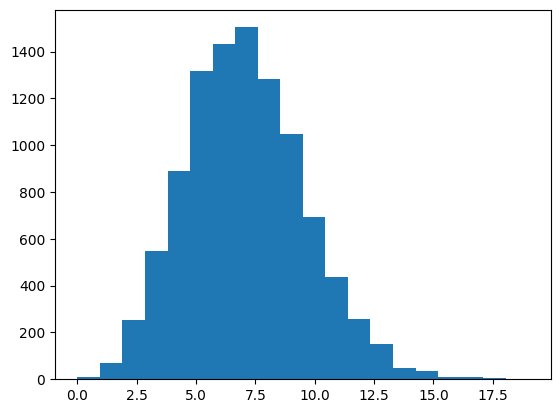

In [47]:
bns = sample.max() - sample.min() + 1
print(bns)
plt.figure()
plt.hist(sample, bins=bns)
plt.show()

In [48]:
x, y = np.histogram(sample, bins=bns)

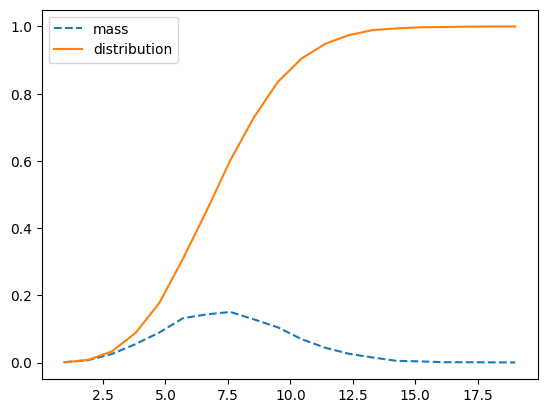

In [49]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

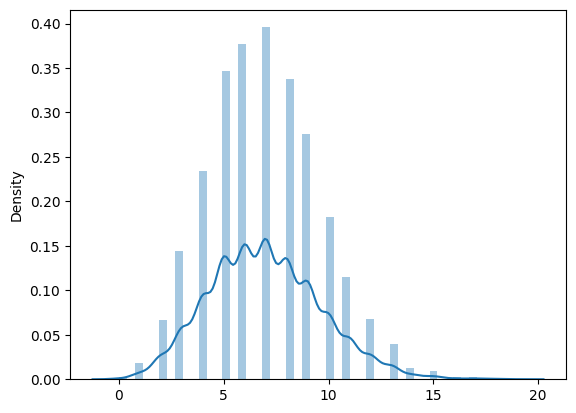

In [50]:
# densidad aproximada
plt.figure()
sns.distplot(sample, kde=True)  #, kde_kws={'bw':0.25})
plt.show()

## Ejemplo LogNormal

In [51]:
# Generar una muestra de una variable logNormal logN(mu, sigma)
# de tamaño N = 10000

N = 10000
mu  = np.log(100)    # parámetro de localización
sig = 1              # parámetro de escala
sample = np.random.lognormal(mu, sig, size=N)

In [52]:
sample.shape

(10000,)

In [53]:
sample[:44]

array([  94.63765247,  687.14777582,   57.97328755,   86.73999879,
        271.22201994,  227.57049656,   39.95810512,  148.02684654,
        594.13118998,   56.18289212,  337.24722763,   79.88556013,
        135.9176189 ,   62.13457047,  272.90470112,   48.91539771,
         17.96539956,   63.06492794,   13.08585673,   77.31219723,
         68.63350316,  236.18821009,   62.7408845 ,  121.53089876,
        188.56473472,  233.01097842,  130.10703057,  105.51421813,
         65.0079655 ,  116.62151327,  305.1952445 ,  774.63778823,
        175.61956192,   44.22591108,   17.01299447,   67.30391504,
        283.51139899, 1460.77572048,  144.57820687,  477.16987543,
         11.870746  ,  154.81910322,   48.88941886,  176.02758298])

100


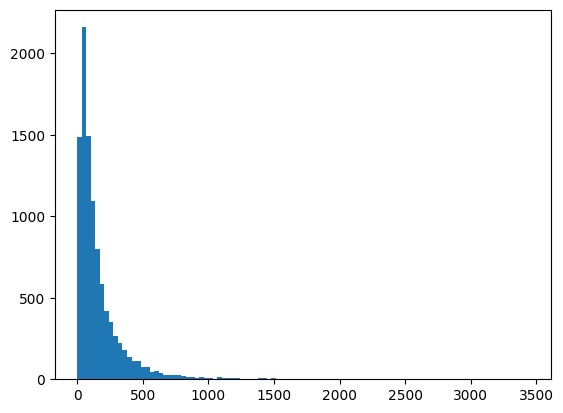

In [54]:
#bns = int(3.3*(1 + np.log(N)))
bns = 100
print(bns)
plt.figure()
plt.hist(sample, bins=bns)
#plt.xscale('log')
plt.show()

In [55]:
x, y = np.histogram(sample, bins=bns)

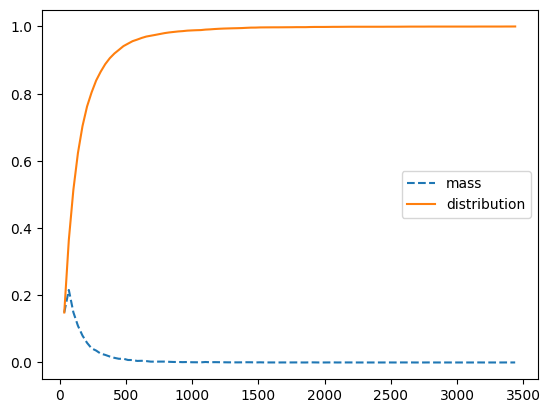

In [56]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

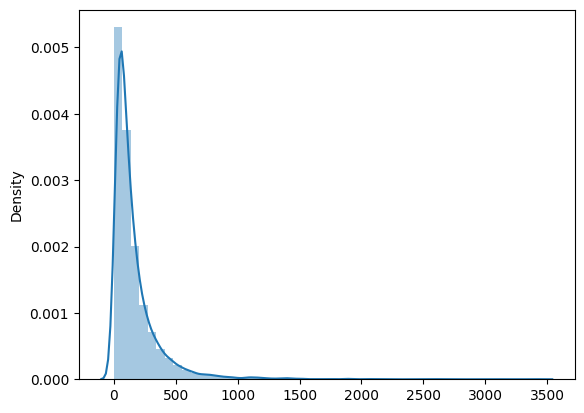

In [57]:
# densidad aproximada
plt.figure()
sns.distplot(sample, kde=True)
plt.show()

In [58]:
logsample = np.log10(sample)

100


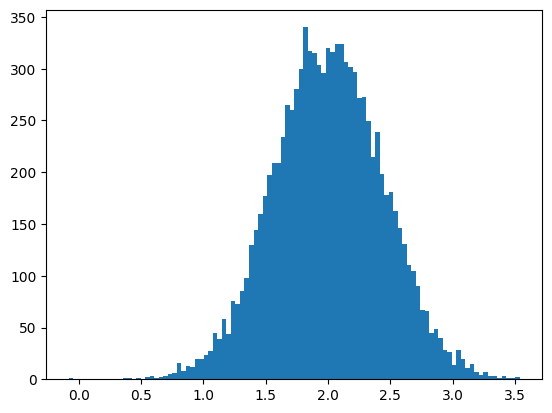

In [59]:
#bns = int(3.3*(1 + np.log(N)))
bns = 100
print(bns)
plt.figure()
plt.hist(logsample, bins=bns)
#plt.xscale('log')
plt.show()

In [60]:
x, y = np.histogram(logsample, bins=bns)

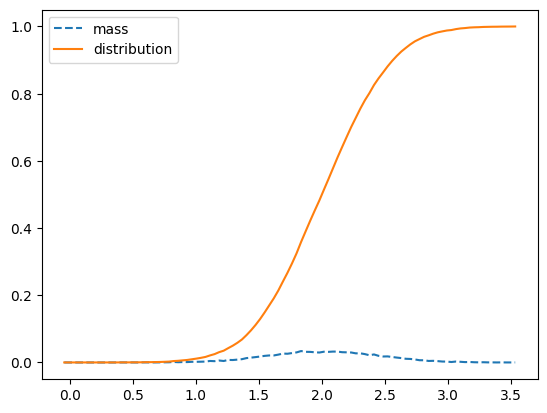

In [61]:
plt.figure()
plt.plot(y[1:], x/N, '--', label='mass')
plt.plot(y[1:], x.cumsum()/N, '-', label='distribution')
plt.legend()
plt.show()

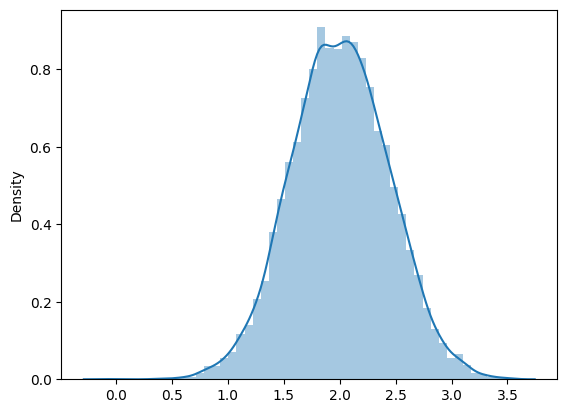

In [62]:
# densidad aproximada
plt.figure()
sns.distplot(logsample, kde=True)
plt.show()